In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [1]:
from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA
raw_bulk = EXAMPLE_MULTI_BULK
raw_sc = EXAMPLE_MULTI_SC

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
EXAMPLE_PROCESSED_DATA.train.metadata

,cluster,age,size,density,category,random_feature,sample_id
0,0,21.194224,4.538300,0.113699,A,-0.657083,sample_303
1,0,23.930016,6.864434,0.086318,A,1.280058,sample_259
2,3,53.074559,12.812042,1.111816,D,-0.046288,sample_717
3,4,53.380117,12.875572,0.525779,C,0.578705,sample_127
4,0,33.724569,2.429471,0.038608,B,0.657419,sample_576
...,...,...,...,...,...,...,...
694,0,28.165998,6.223125,0.286763,E,0.047880,sample_578
695,1,31.830988,4.929979,0.456122,B,0.126054,sample_946
696,2,40.607502,6.923138,2.313312,B,-0.288755,sample_284
697,0,40.449944,0.831899,0.096780,C,1.070726,sample_462


In [2]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

cpu not relevant here
Epoch: 0, Loss: 880.9662551879883
Epoch: 1, Loss: 810.2192840576172
Epoch: 2, Loss: 727.6762104034424
Epoch: 3, Loss: 652.7055377960205
Epoch: 4, Loss: 600.6310157775879
Epoch: 5, Loss: 555.4302349090576
Epoch: 6, Loss: 523.3139057159424
Epoch: 7, Loss: 487.9764347076416
Epoch: 8, Loss: 456.9493923187256
Epoch: 9, Loss: 430.01477241516113
Epoch: 10, Loss: 407.0519313812256
Epoch: 11, Loss: 384.4775905609131
Epoch: 12, Loss: 359.49019718170166
Epoch: 13, Loss: 350.37535285949707
Epoch: 14, Loss: 364.82240104675293
Epoch: 15, Loss: 337.99076557159424
Epoch: 16, Loss: 330.68276500701904
Epoch: 17, Loss: 334.95071029663086
Epoch: 18, Loss: 328.3873815536499
Epoch: 19, Loss: 316.9281015396118
Epoch: 20, Loss: 318.94721031188965
Epoch: 21, Loss: 322.652738571167
Epoch: 22, Loss: 307.4213914871216
Epoch: 23, Loss: 310.268762588501
Epoch: 24, Loss: 312.2185392379761
Epoch: 25, Loss: 290.2777519226074
Epoch: 26, Loss: 312.2716751098633
Epoch: 27, Loss: 283.86137294769287
E

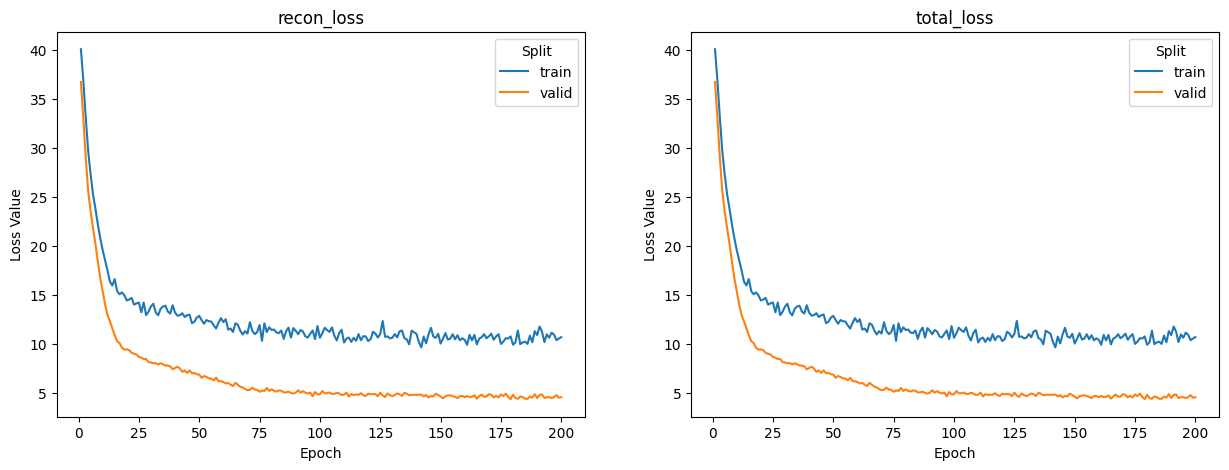

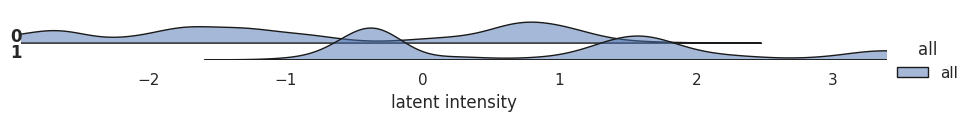

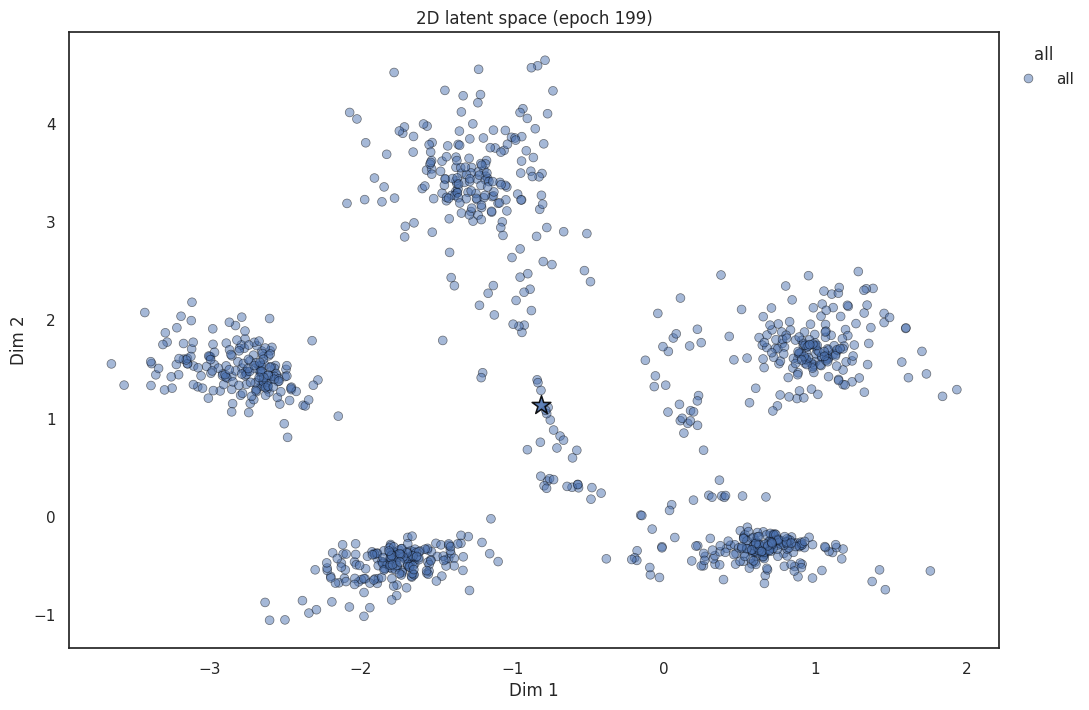

In [10]:
vanillix = acx.Vanillix(config=DefaultConfig(epochs=200, learning_rate=0.005,n_layers=1, latent_dim=2), user_data=processed_data)
vanillix.run()
vanillix.show_result()

In [11]:
categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
categorical_clusters

['Cluster_0',
 'Cluster_0',
 'Cluster_3',
 'Cluster_4',
 'Cluster_0',
 'Cluster_4',
 'Cluster_4',
 'Cluster_2',
 'Cluster_2',
 'Cluster_3',
 'Cluster_0',
 'Cluster_1',
 'Cluster_4',
 'Cluster_3',
 'Cluster_3',
 'Cluster_1',
 'Cluster_3',
 'Cluster_0',
 'Cluster_0',
 'Cluster_3',
 'Cluster_3',
 'Cluster_0',
 'Cluster_1',
 'Cluster_4',
 'Cluster_0',
 'Cluster_1',
 'Cluster_0',
 'Cluster_3',
 'Cluster_4',
 'Cluster_3',
 'Cluster_1',
 'Cluster_2',
 'Cluster_2',
 'Cluster_2',
 'Cluster_1',
 'Cluster_0',
 'Cluster_4',
 'Cluster_0',
 'Cluster_2',
 'Cluster_1',
 'Cluster_3',
 'Cluster_3',
 'Cluster_4',
 'Cluster_2',
 'Cluster_2',
 'Cluster_4',
 'Cluster_3',
 'Cluster_4',
 'Cluster_4',
 'Cluster_2',
 'Cluster_4',
 'Cluster_1',
 'Cluster_0',
 'Cluster_3',
 'Cluster_2',
 'Cluster_0',
 'Cluster_2',
 'Cluster_4',
 'Cluster_0',
 'Cluster_0',
 'Cluster_3',
 'Cluster_0',
 'Cluster_1',
 'Cluster_4',
 'Cluster_4',
 'Cluster_3',
 'Cluster_4',
 'Cluster_1',
 'Cluster_1',
 'Cluster_1',
 'Cluster_1',
 'Clus

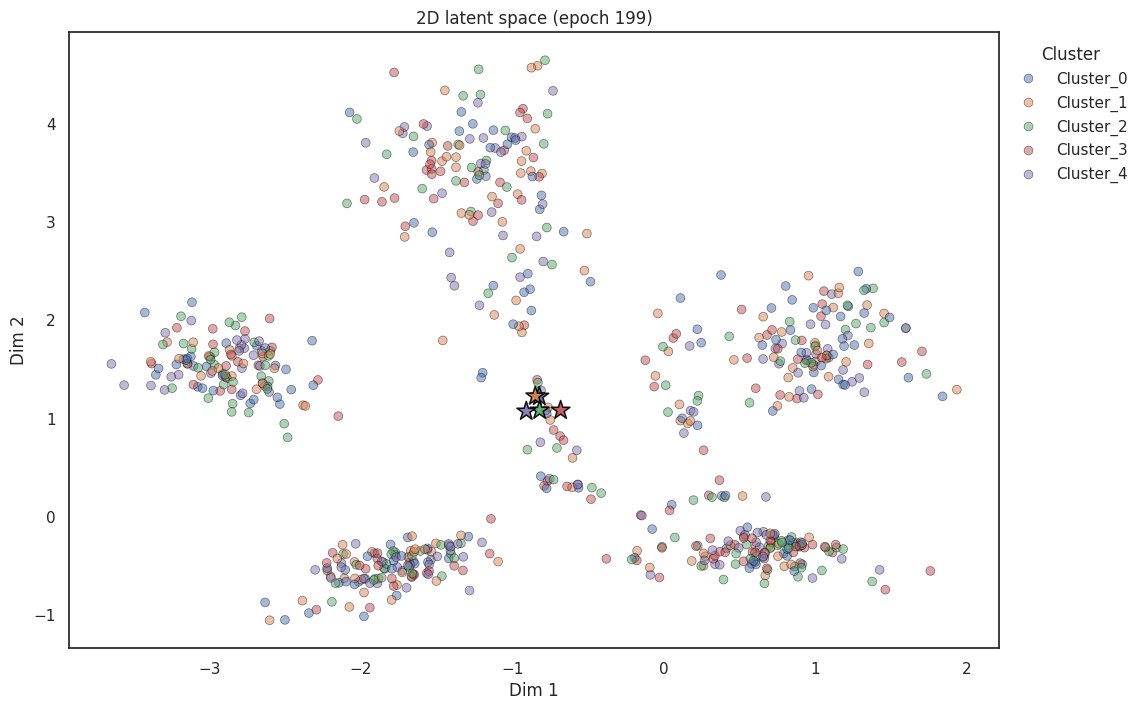

In [ ]:
vanillix._visualizer.show_latent_space(result=vanillix.result,plot_type="2D-scatter", split="train", label_list=categorical_clusters, param="Cluster")
## Problem: during training sample order is shuffled due to batching. Order cannot be recovered with current result object.

In [6]:
vanillix.result.model

VanillixArchitecture(
  (_encoder): Sequential(
    (0): Linear(in_features=30, out_features=7, bias=True)
    (1): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=2, bias=True)
  )
  (_decoder): Sequential(
    (0): Linear(in_features=2, out_features=7, bias=True)
    (1): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=30, bias=True)
  )
)

## Ontix

In [40]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA


In [26]:

ont_lvl1 = dict()
ont_lvl2 = dict()

ont_lvl1["pwy-1"] = ["sub-pwy-1", "sub-pwy-2"]
ont_lvl1["pwy-2"] = ["sub-pwy-na"]
ont_lvl1["pwy-3"] = ["sub-pwy-3"]
# first third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-1"] = processed_data.train.feature_ids[: int(len(processed_data.train.feature_ids) / 3)]
# second third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-2"] = processed_data.train.feature_ids[
	int(len(processed_data.train.feature_ids) / 3) : int(2 * len(processed_data.train.feature_ids) / 3)
]
# last third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-3"] = processed_data.train.feature_ids[
	int(2 * len(processed_data.train.feature_ids) / 3) : int(len(processed_data.train.feature_ids))
]

# ont_lvl2["sub-pwy-1"] = ["gene-1", "gene-2"]
# ont_lvl2["sub-pwy-2"] = ["gene-3", "gene-4"]
# ont_lvl2["sub-pwy-3"] = ["gene-2", "gene-6"]

ontology_tuple = ( ont_lvl1, ont_lvl2 )


In [19]:
len(ont_lvl1.keys())

3

In [27]:
ontology_tuple

({'pwy-1': ['sub-pwy-1', 'sub-pwy-2'],
  'pwy-2': ['sub-pwy-na'],
  'pwy-3': ['sub-pwy-3']},
 {'sub-pwy-1': ['feature_0',
   'feature_1',
   'feature_2',
   'feature_3',
   'feature_4',
   'feature_5',
   'feature_6',
   'feature_7',
   'feature_8',
   'feature_9'],
  'sub-pwy-2': ['feature_10',
   'feature_11',
   'feature_12',
   'feature_13',
   'feature_14',
   'feature_15',
   'feature_16',
   'feature_17',
   'feature_18',
   'feature_19'],
  'sub-pwy-3': ['feature_20',
   'feature_21',
   'feature_22',
   'feature_23',
   'feature_24',
   'feature_25',
   'feature_26',
   'feature_27',
   'feature_28',
   'feature_29']})

In [ ]:
ontix = acx.Ontix(ontologies=ontology_tuple, config=DefaultConfig(epochs=10, learning_rate=0.005,n_layers=1), user_data=processed_data)

In [29]:
ontix.run()

cpu not relevant here
Mask layer 0 with shape torch.Size([3, 3]) and 3.0 connections
Mask layer 1 with shape torch.Size([30, 3]) and 30.0 connections
Latent Dim: 3
[30, 7, 3]
Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=30, bias=True)
)
torch.Size([32, 3])
Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=30, bias=True)
)
torch.Size([32, 3])
Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=30, bias=True)
)
torch.Size([32, 3])
Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=30, bias=True)
)
torch.Size([32, 3])
Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=30, bias=True)
)
torch.Size([32, 3])
Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Linear(in_featu

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: OntixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x7fe4e19a3e20>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x7fe4e1cefc70>, test=<autoencodix.data._numeric_dataset.NumericDataset object at 0x7fe4e19a3ee0>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 201 × 3
    uns: 'var_names'
final_reconstruction: <autoencodix.data._numeric_dataset.NumericDataset object at 0x7fe5d1e9c9a0>
sub_results: None
sub_reconstruction

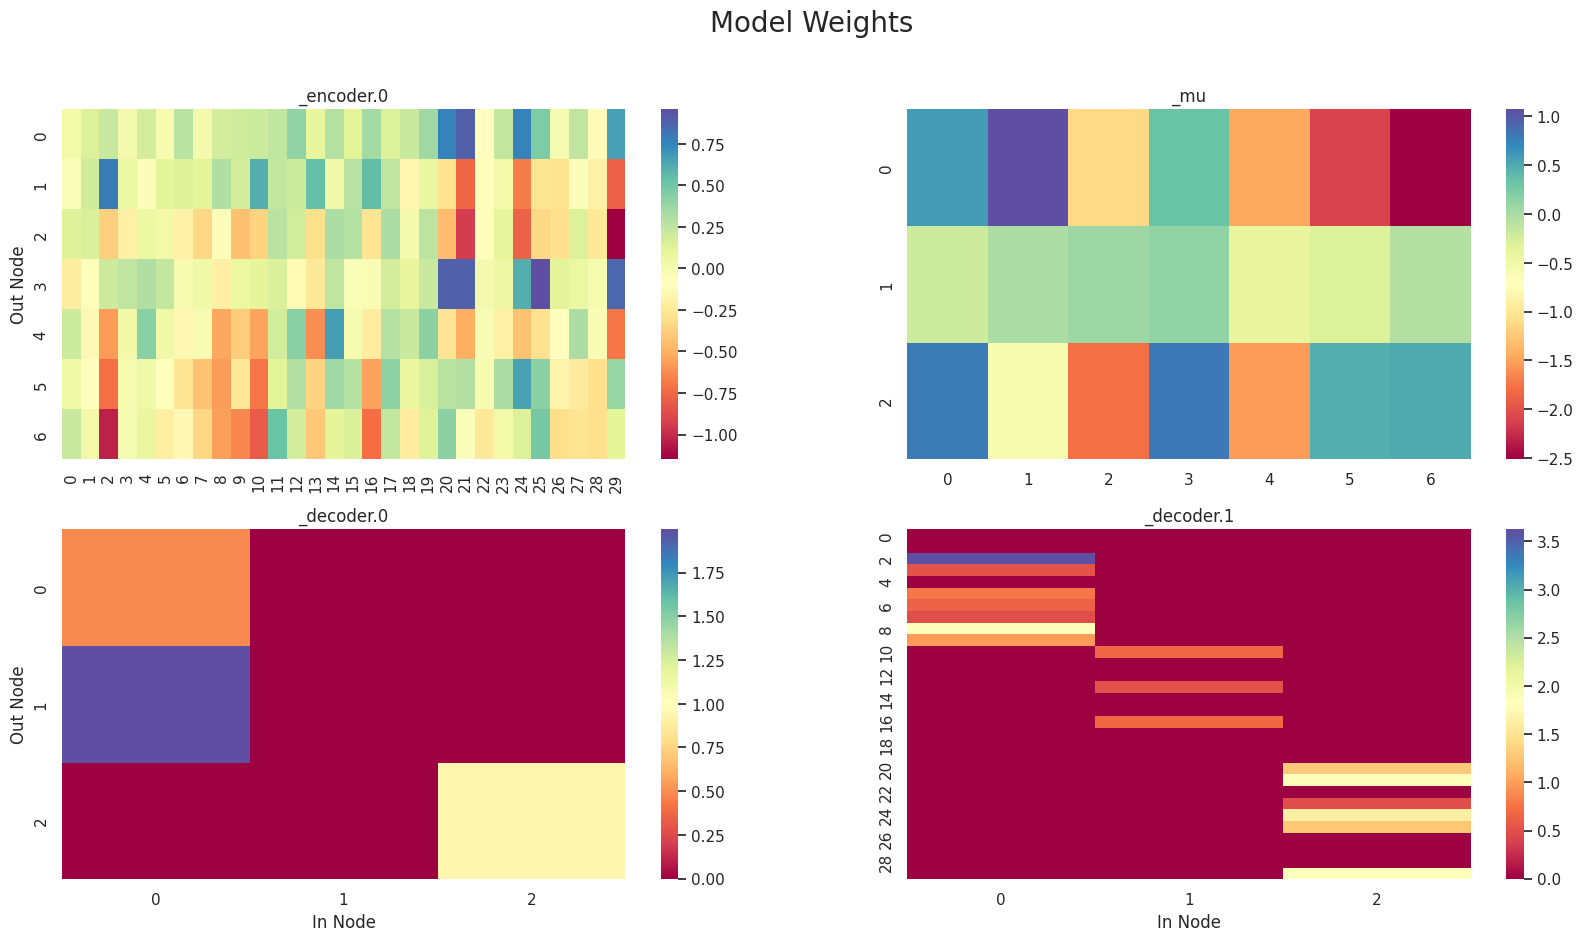

In [41]:
ontix._visualizer.show_weights()

Creating plots ...


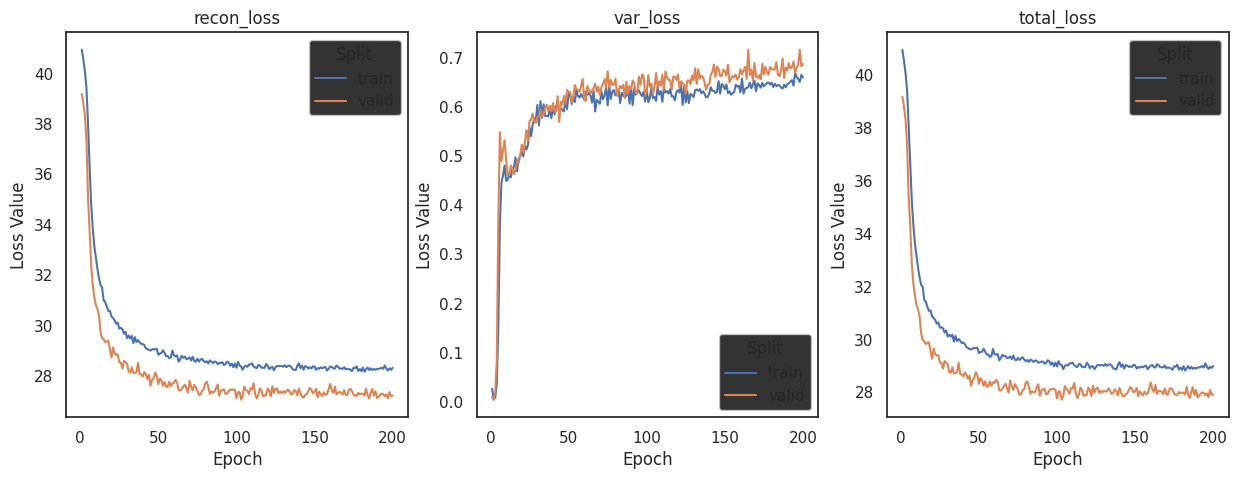

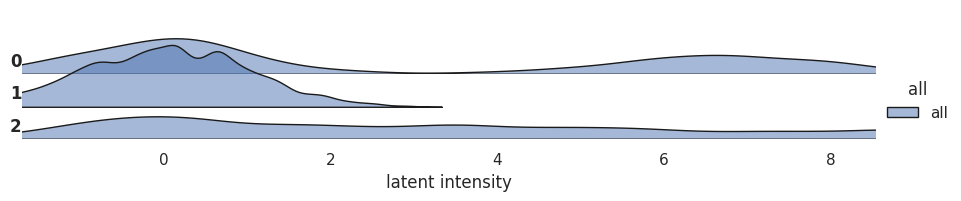

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


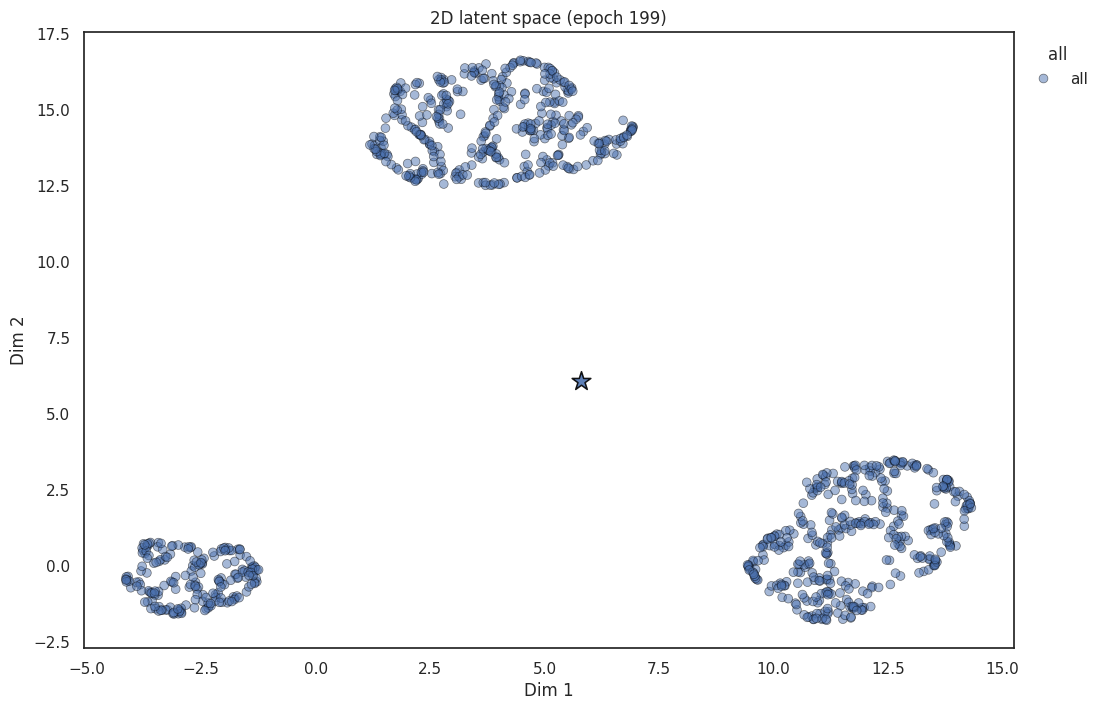

In [31]:
ontix.show_result()

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


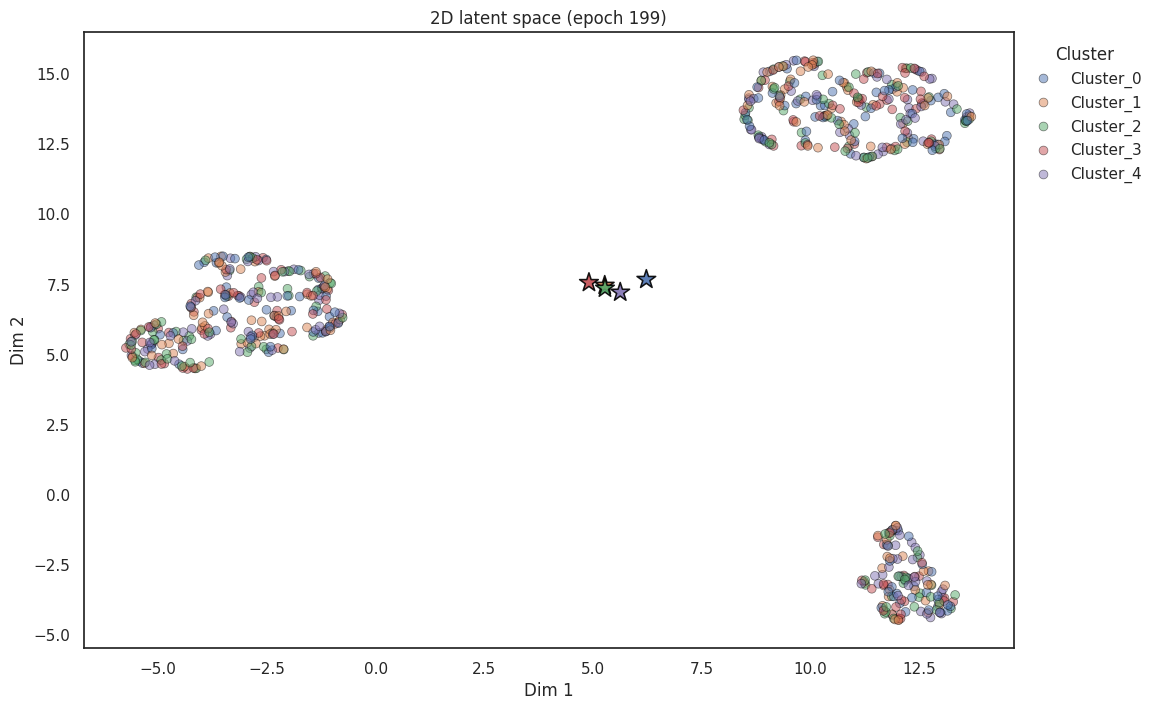

In [25]:
categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
categorical_clusters
ontix._visualizer.show_latent_space(result=ontix.result,plot_type="2D-scatter", split="train", label_list=categorical_clusters, param="Cluster")

In [54]:
ontix.ontologies

({'pwy-1': ['sub-pwy-1', 'sub-pwy-2'], 'pwy-2': ['sub-pwy-3', 'sub-pwy-2']},
 {'sub-pwy-1': ['feature_0',
   'feature_1',
   'feature_2',
   'feature_3',
   'feature_4',
   'feature_5',
   'feature_6',
   'feature_7',
   'feature_8',
   'feature_9'],
  'sub-pwy-2': ['feature_10',
   'feature_11',
   'feature_12',
   'feature_13',
   'feature_14',
   'feature_15',
   'feature_16',
   'feature_17',
   'feature_18',
   'feature_19'],
  'sub-pwy-3': ['feature_20',
   'feature_21',
   'feature_22',
   'feature_23',
   'feature_24',
   'feature_25',
   'feature_26',
   'feature_27',
   'feature_28',
   'feature_29']})

In [ ]:
enumerate(ontix.result.model.ontologies)

In [39]:
ontix.result.model.ontologies[1].keys()

dict_keys(['sub-pwy-1', 'sub-pwy-2', 'sub-pwy-3'])

/tmp/ipykernel_19925/3884008002.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")
/tmp/ipykernel_19925/3884008002.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")


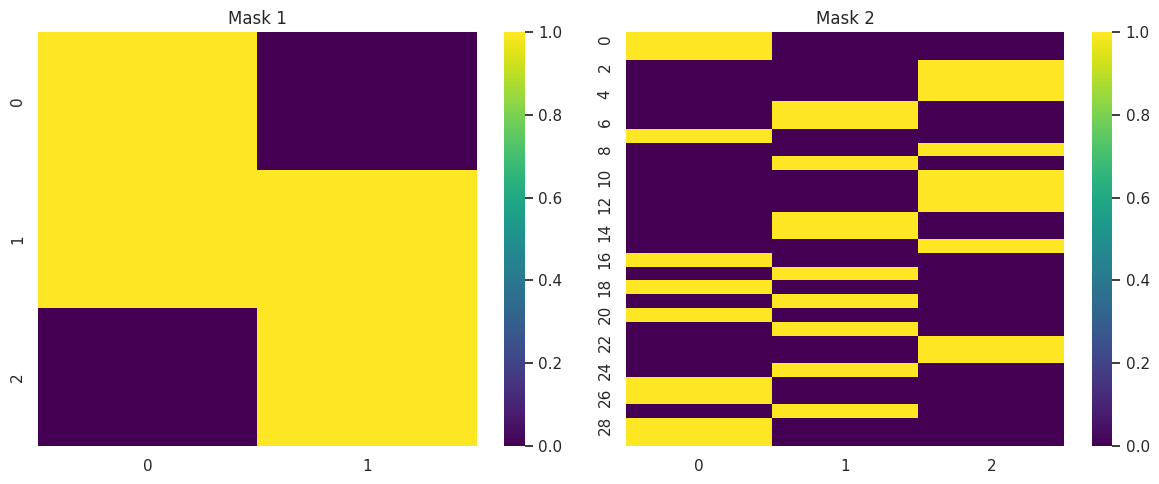

In [65]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

masks = ontix.result.model.masks

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, mask in enumerate(masks):
	sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")
	axes[i].set_title(f"Mask {i+1}")
plt.tight_layout()
plt.show()

In [70]:
ontix.preprocessed_data.train.feature_ids

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29']

In [53]:
# Print all available attributes of ontix
print("Attributes of ontix:")
for attr in dir(ontix):
	if not attr.startswith("__"):
		print(attr)


Attributes of ontix:
_abc_impl
_data_splitter
_dataset_type
_datasets
_evaluator
_fill_data_info
_handle_direct_user_data
_loss_type
_model_type
_preprocessor
_preprocessor_type
_trainer
_trainer_type
_validate_config_data
_validate_container
_validate_raw_user_data
_validate_user_data
_visualizer
config
decode
evaluate
fit
load
ontologies
predict
preprocess
preprocessed_data
raw_user_data
result
run
sample_latent_space
save
show_result
visualize


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


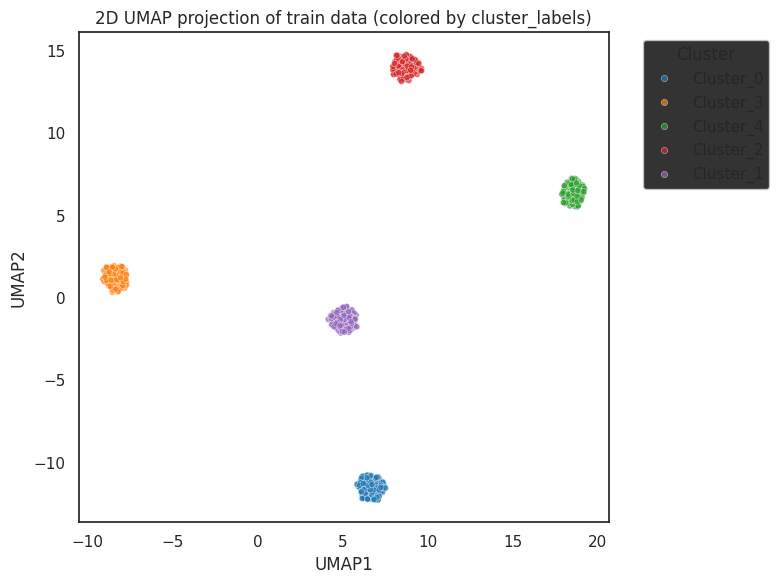

In [23]:
import seaborn as sns
import pandas as pd
import umap
import matplotlib.pyplot as plt


# Fit UMAP to reduce to 2D
umap_2d_seaborn = umap.UMAP(n_components=2, random_state=42)
embedding_seaborn = umap_2d_seaborn.fit_transform(EXAMPLE_PROCESSED_DATA.train.data)

# Create a DataFrame for plotting
umap_df = pd.DataFrame({
	"UMAP1": embedding_seaborn[:, 0],
	"UMAP2": embedding_seaborn[:, 1],
	"Cluster": categorical_clusters
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
	data=umap_df,
	x="UMAP1",
	y="UMAP2",
	hue="Cluster",
	palette="tab10",
	s=20,
	alpha=0.7
)
plt.title("2D UMAP projection of train data (colored by cluster_labels)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()